In [24]:
import pandas as pd
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt
import numpy as np

In [55]:
data = pd.read_csv('../data/basic_data.csv')

In [56]:
data['log_closePrice'] = np.log(data['closePrice'])

In [57]:
colint_stock_list = []

for stock_i in range(50):

    stock_i_df = data[data['stock'] == stock_i]

    for stock_j in range(stock_i+1, 50):
        
        stock_j_df = data[data['stock'] == stock_j]

        outcome = coint(stock_i_df['log_closePrice'], stock_j_df['log_closePrice'])

        if outcome[1] < 0.05:
            colint_stock_list.append(([stock_i, stock_j], outcome))
            print(stock_i, stock_j)


3 18
9 18
10 34
10 37
12 18
13 43
18 19
18 20
18 29
18 30
18 34
18 37
18 42
18 44
18 48
20 29
20 34
20 42
22 39
33 39
35 41


In [ ]:
for ([stock_i, stock_j], outcome) in colint_stock_list:
    stock_i_df = data[data['stock'] == stock_i]
    stock_j_df = data[data['stock'] == stock_j]

    print(stock_i, stock_j)

    plt.plot(stock_i_df['date'], stock_i_df['closePrice'], label=stock_i)
    plt.plot(stock_j_df['date'], stock_j_df['closePrice'], label=stock_j)
    plt.show()


In [ ]:
colint_stock_list_ct = []

for stock_i in range(50):

    stock_i_df = data[data['stock'] == stock_i]

    for stock_j in range(stock_i+1, 50):
        
        stock_j_df = data[data['stock'] == stock_j]

        outcome = coint(stock_i_df['log_closePrice'], stock_j_df['log_closePrice'], trend = 'ct')

        if outcome[1] < 0.05:
            colint_stock_list_ct.append(([stock_i, stock_j], outcome))
            print(stock_i, stock_j)


In [ ]:
len(colint_stock_list_ct)

0 12


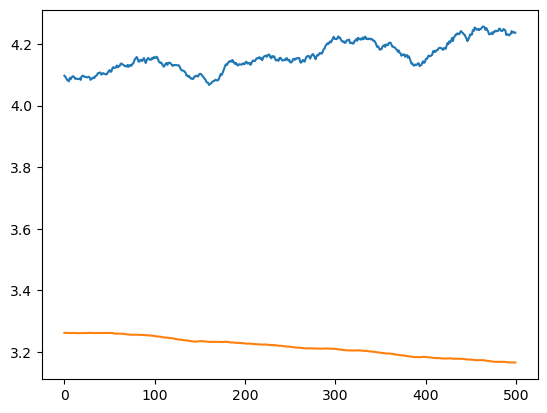

0 46


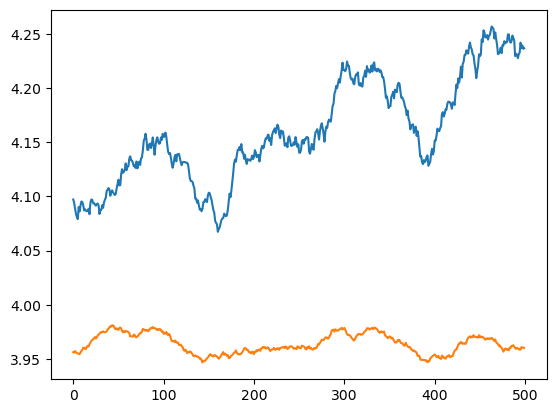

4 35


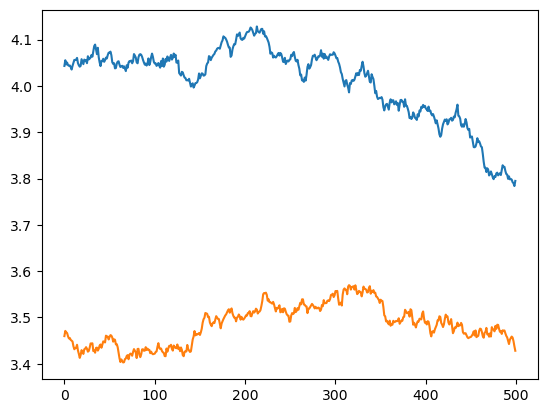

10 33


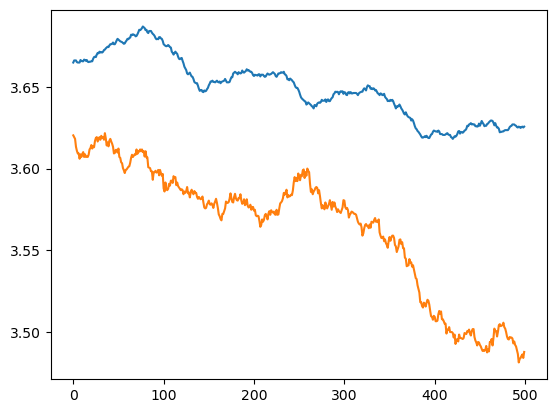

12 27


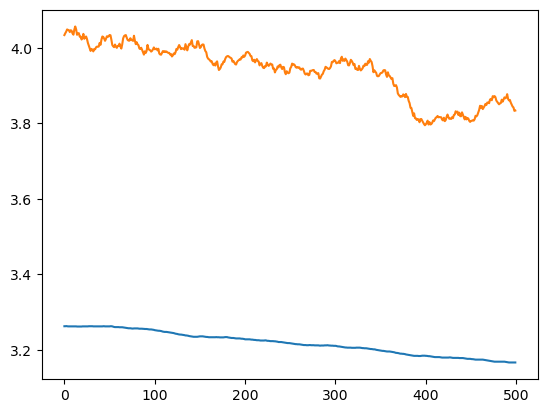

13 34


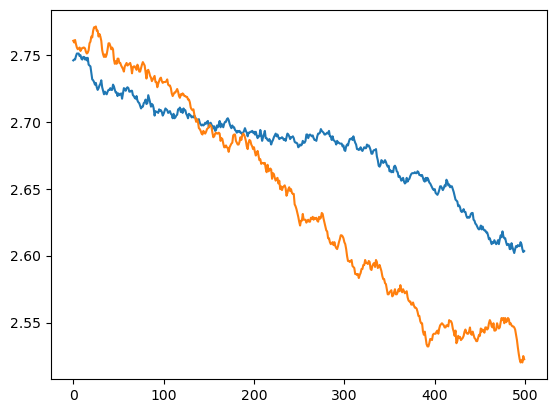

16 39


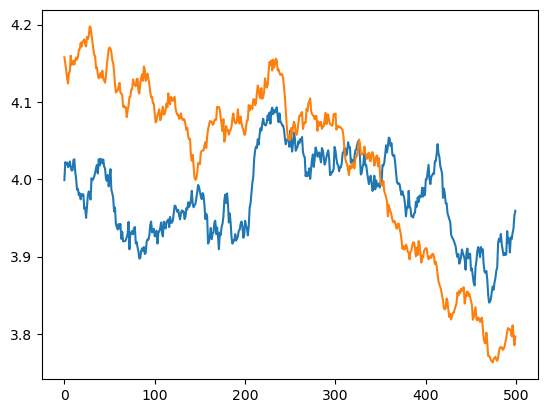

18 23


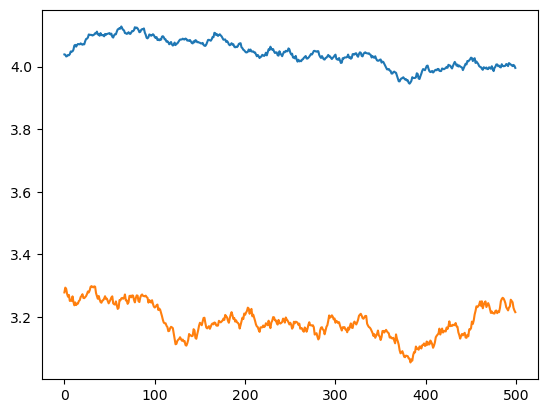

18 30


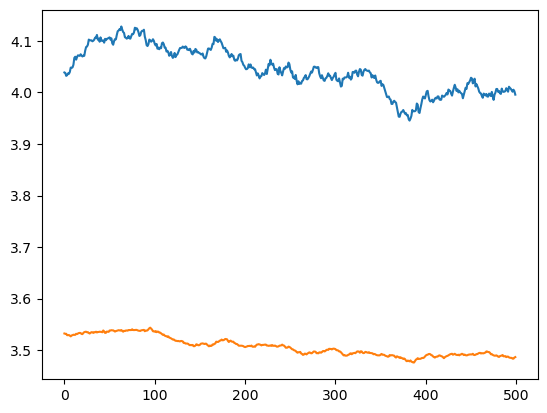

18 34


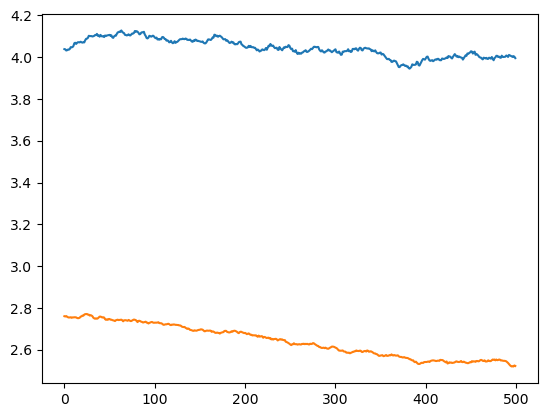

18 42


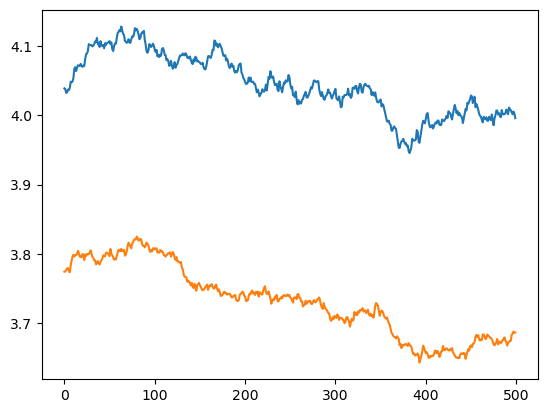

18 48


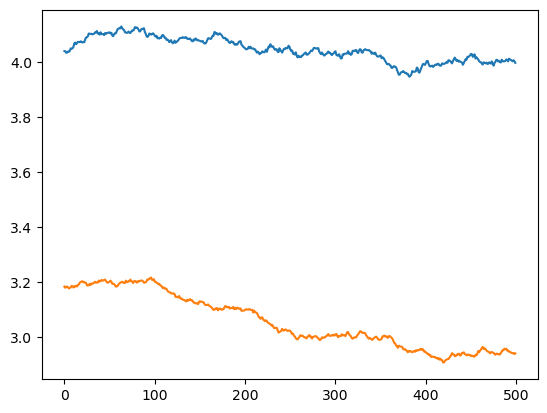

18 49


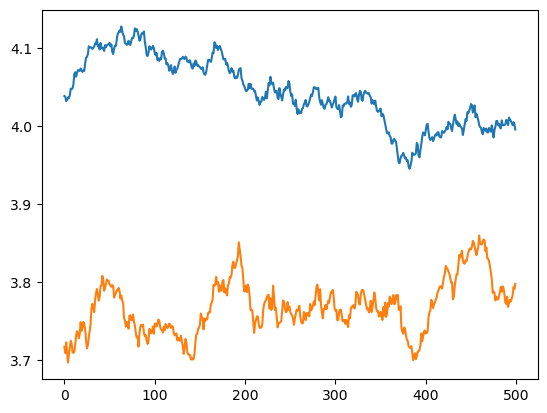

19 37


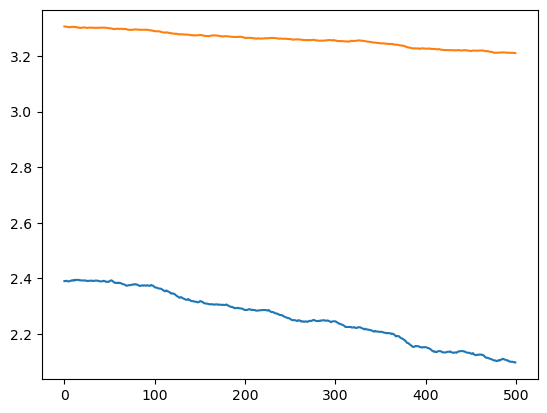

20 23


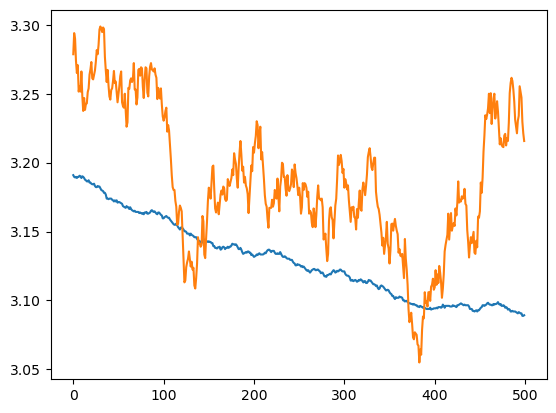

22 25


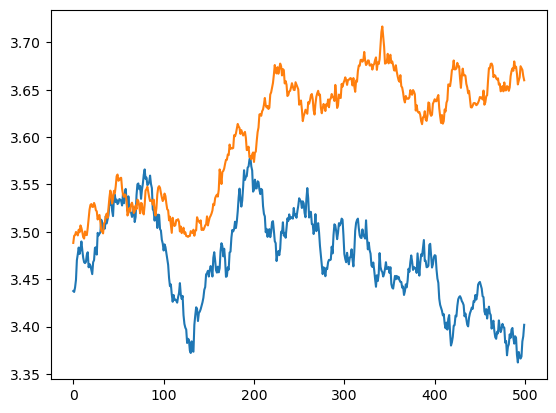

25 35


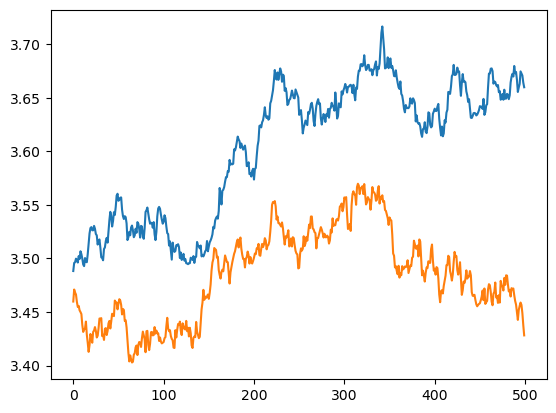

25 39


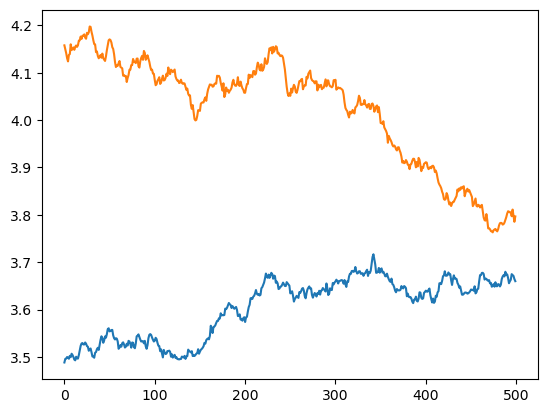

31 38


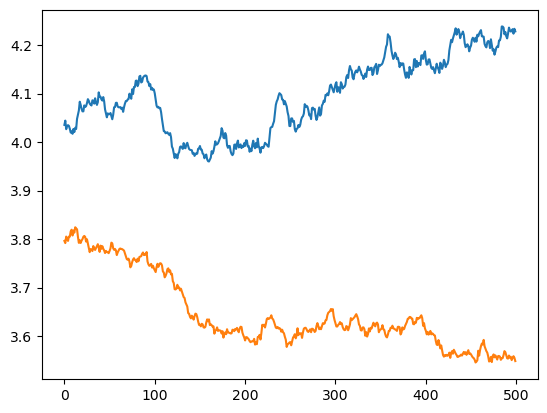

33 39


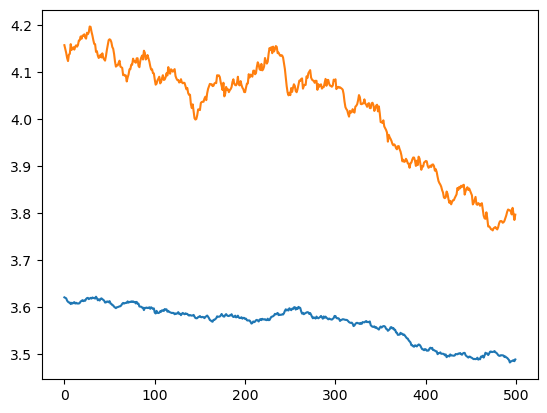

34 36


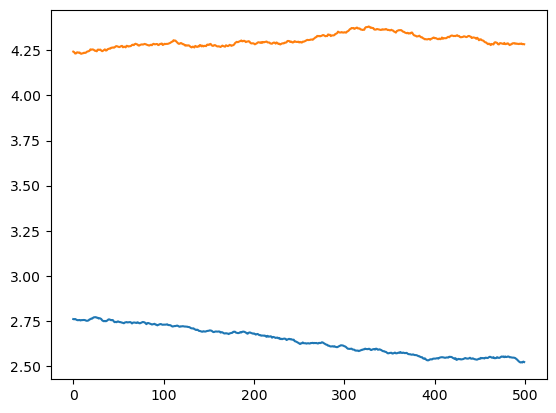

34 48


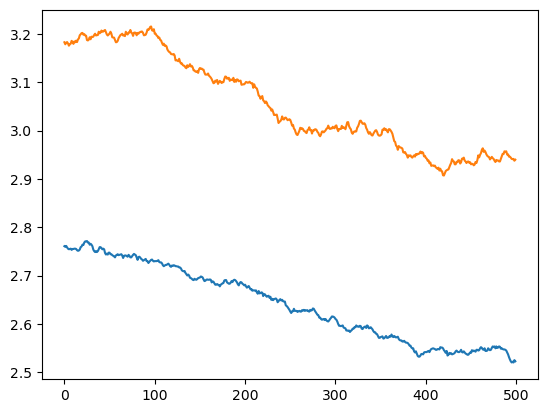

35 39


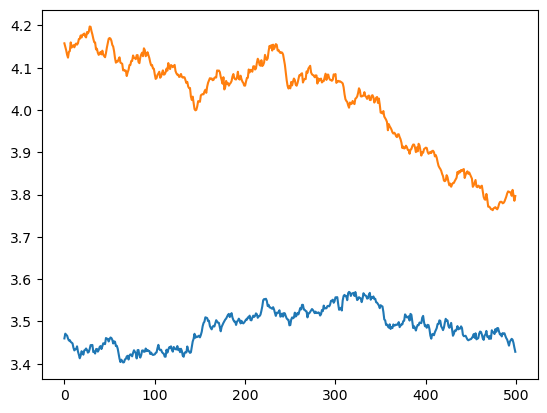

39 41


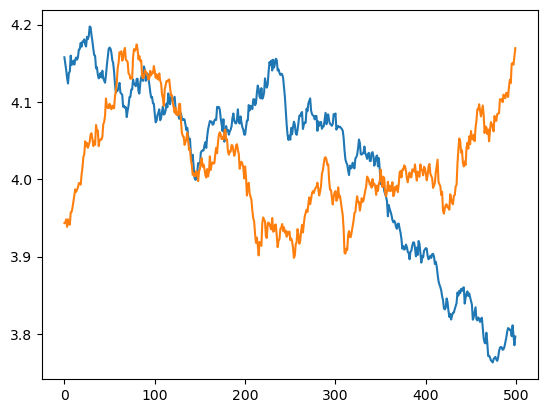

In [54]:
for ([stock_i, stock_j], outcome) in colint_stock_list_ct:
    stock_i_df = data[data['stock'] == stock_i]
    stock_j_df = data[data['stock'] == stock_j]

    print(stock_i, stock_j)

    plt.plot(stock_i_df['date'], stock_i_df['log_closePrice'], label=stock_i)
    plt.plot(stock_j_df['date'], stock_j_df['log_closePrice'], label=stock_j)
    plt.show()


In [26]:
colint_stock_list_ct[20]

([34, 36],
 (-3.835765014559812,
  0.04330999768121991,
  array([-4.35870257, -3.79967781, -3.51053148])))

In [53]:
from sklearn.linear_model import LinearRegression

coint_trend_diff_price = pd.DataFrame(columns=['Pair', 'Slope', 'intercept'])

for ([stock_i, stock_j], outcome) in colint_stock_list_ct:
    stock_i_df = data[data['stock'] == stock_i]
    stock_j_df = data[data['stock'] == stock_j]

    # Price difference df
    diff = pd.DataFrame()
    diff['difference'] = (stock_i_df['closePrice'].reset_index() - stock_j_df['closePrice'].reset_index())['closePrice']
    diff = np.array(diff['difference']).reshape(-1, 1)
    
    # Fit linear regression
    LR = LinearRegression(n_jobs=-1).fit(diff, stock_i_df['date'])

    # Append new data
    new_data = {
        'Pair': [(stock_i, stock_j)],
        'Slope': [LR.coef_],
        'intercept': [LR.intercept_]
    }
    new_df = pd.DataFrame(new_data)
    coint_trend_diff_price = coint_trend_diff_price.append(new_df, ignore_index=True)


coint_trend_diff_price

/var/folders/xk/rsnckpln5pl_8hrnss0pynlh0000gn/T/ipykernel_92085/3402130092.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coint_trend_diff = coint_trend_diff.append(new_df, ignore_index=True)
/var/folders/xk/rsnckpln5pl_8hrnss0pynlh0000gn/T/ipykernel_92085/3402130092.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coint_trend_diff = coint_trend_diff.append(new_df, ignore_index=True)
/var/folders/xk/rsnckpln5pl_8hrnss0pynlh0000gn/T/ipykernel_92085/3402130092.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coint_trend_diff = coint_trend_diff.append(new_df, ignore_index=True)
/var/folders/xk/rsnckpln5pl_8hrnss0pynlh0000gn/T/ipykernel_92085/3402130092.py:24: FutureWarning: The frame.append method is deprecated 

,Pair,Slope,intercept
0,"(0, 12)",[34.44346521012146],-1099.871659
1,"(0, 46)",[42.5741346700875],-239.365165
2,"(4, 35)",[-29.692380789612475],921.336435
3,"(10, 33)",[130.90305242508256],-158.317988
4,"(12, 27)",[43.66114385838506],1405.722187
5,"(13, 34)",[195.23601382845564],143.022183
6,"(16, 39)",[23.624626748127586],314.781931
7,"(18, 23)",[-53.163252586493705],1994.252027
8,"(18, 30)",[-60.19650645350908],1678.330297
9,"(18, 34)",[-60.643034733203194],2858.434913


In [64]:
coint_trend_diff_log_price = pd.DataFrame(columns=['Pair', 'Slope', 'intercept'])

for ([stock_i, stock_j], outcome) in colint_stock_list_ct:
    stock_i_df = data[data['stock'] == stock_i]
    stock_j_df = data[data['stock'] == stock_j]

    # Price difference df
    diff = pd.DataFrame()
    diff['difference'] = (stock_i_df['log_closePrice'].reset_index() - stock_j_df['log_closePrice'].reset_index())['log_closePrice']
    diff = np.array(diff['difference']).reshape(-1, 1)
    
    # Fit linear regression
    LR = LinearRegression(n_jobs=-1).fit(diff, stock_i_df['date'])

    # Append new data
    new_data = {
        'Pair': [(stock_i, stock_j)],
        'Slope': [LR.coef_],
        'intercept': [LR.intercept_]
    }
    new_df = pd.DataFrame(new_data)
    coint_trend_diff_log_price = coint_trend_diff_log_price.append(new_df, ignore_index=True)


coint_trend_diff_log_price

/var/folders/xk/rsnckpln5pl_8hrnss0pynlh0000gn/T/ipykernel_92085/3346563197.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coint_trend_diff_log_price = coint_trend_diff_log_price.append(new_df, ignore_index=True)
/var/folders/xk/rsnckpln5pl_8hrnss0pynlh0000gn/T/ipykernel_92085/3346563197.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coint_trend_diff_log_price = coint_trend_diff_log_price.append(new_df, ignore_index=True)
/var/folders/xk/rsnckpln5pl_8hrnss0pynlh0000gn/T/ipykernel_92085/3346563197.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  coint_trend_diff_log_price = coint_trend_diff_log_price.append(new_df, ignore_index=True)
/var/folders/xk/rsnckpln5pl_8hrnss0pynlh0000gn/T/ipykernel_92085/3346563197.

,Pair,Slope,intercept
0,"(0, 12)",[1818.0402998208601],-1464.301143
1,"(0, 46)",[2789.2851181562373],-297.450751
2,"(4, 35)",[-1537.846111014278],1056.009634
3,"(10, 33)",[4517.545932817179],-134.896513
4,"(12, 27)",[2457.9415802638164],2021.389062
5,"(13, 34)",[2734.9325349042047],138.962754
6,"(16, 39)",[1277.6125743137995],307.464198
7,"(18, 23)",[-936.4515745685275],1050.838092
8,"(18, 30)",[-3750.5107424339344],2262.340656
9,"(18, 34)",[2976.0026610417913],-3925.028078
